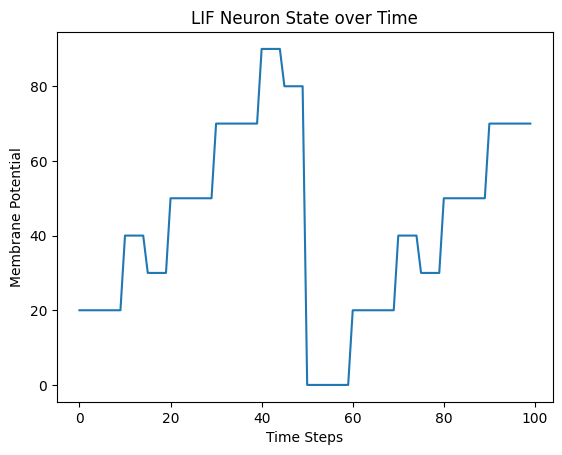

In [11]:
class LIFNeuronState:
    def __init__(self, leak_str=5, leak_en=True, thr=100):
        self.membrane_potential = 0
        self.leak_str = leak_str
        self.leak_en = leak_en
        self.thr = thr

    def step(self, event_leak, event_inh, event_exc, syn_weight):
        if event_leak and self.leak_en:
            self.membrane_potential = max(0, self.membrane_potential - self.leak_str)
        elif event_inh:
            self.membrane_potential = max(0, self.membrane_potential - syn_weight)
        elif event_exc:
            self.membrane_potential += syn_weight

        spike_out = 1 if self.membrane_potential >= self.thr else 0
        if spike_out:
            self.membrane_potential = 0

        return self.membrane_potential

    
    # Simulation code
import matplotlib.pyplot as plt
# Simulation parameters
time_steps = 100
neuron = LIFNeuronState(leak_str=5, leak_en=1, thr=100)
membrane_potentials = []

for t in range(time_steps):
    if t % 10 == 0:  # Introducing an excitatory event every 10 time steps
        spike = neuron.step(event_leak=0, event_inh=0, event_exc=1, syn_weight=20)
    elif t % 15 == 0:  # Introducing an inhibitory event every 15 time steps
        spike = neuron.step(event_leak=0, event_inh=1, event_exc=0, syn_weight=10)
    else:
        spike = neuron.step(event_leak=0, event_inh=0, event_exc=0, syn_weight=0)
    membrane_potentials.append(neuron.membrane_potential)

# Plot the results

import matplotlib.pyplot as plt

plt.plot(membrane_potentials)
plt.xlabel('Time Steps')
plt.ylabel('Membrane Potential')
plt.title('LIF Neuron State over Time')
plt.show()
